In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df1=pd.read_csv("application_data.csv")
df2=pd.read_csv("previous_application.csv")

In [4]:
df1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
df1.shape

(307511, 122)

In [6]:
df2.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
print(df1.shape)
print(df2.shape)

(307511, 122)
(1670214, 37)


In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [9]:
df1.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [11]:
df1.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 122, dtype: object

# Check missing values
* Column-wise null count 

In [12]:
df1.isnull().sum(axis=0).sort_values(ascending=False).head(60)


COMMONAREA_MEDI                 214865
COMMONAREA_AVG                  214865
COMMONAREA_MODE                 214865
NONLIVINGAPARTMENTS_MODE        213514
NONLIVINGAPARTMENTS_AVG         213514
NONLIVINGAPARTMENTS_MEDI        213514
FONDKAPREMONT_MODE              210295
LIVINGAPARTMENTS_MODE           210199
LIVINGAPARTMENTS_AVG            210199
LIVINGAPARTMENTS_MEDI           210199
FLOORSMIN_AVG                   208642
FLOORSMIN_MODE                  208642
FLOORSMIN_MEDI                  208642
YEARS_BUILD_MEDI                204488
YEARS_BUILD_MODE                204488
YEARS_BUILD_AVG                 204488
OWN_CAR_AGE                     202929
LANDAREA_MEDI                   182590
LANDAREA_MODE                   182590
LANDAREA_AVG                    182590
BASEMENTAREA_MEDI               179943
BASEMENTAREA_AVG                179943
BASEMENTAREA_MODE               179943
EXT_SOURCE_1                    173378
NONLIVINGAREA_MODE              169682
NONLIVINGAREA_AVG        

In [13]:
x=len(df1)/2
x

153755.5

* columns which have null values more than 50% 

In [14]:
y=df1.columns[df1.isna().sum()>x]

In [15]:
y.shape

(41,)

In [16]:
y

Index(['OWN_CAR_AGE', 'EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG',
       'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG',
       'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG',
       'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BUILD_MODE',
       'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMIN_MODE',
       'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI',
       'BASEMENTAREA_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI',
       'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI',
       'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI',
       'NONLIVINGAREA_MEDI', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE',
       'WALLSMATERIAL_MODE'],
      dtype='object')

# #Remove missing values

In [18]:
df1=df1[df1.columns[df1.isna().sum()<x]]

In [19]:
df1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
df1.shape

(307511, 81)

In [21]:
round(100*(df1.isnull().sum()/len(df1.index)),2).sort_values(ascending=False).head(60)

FLOORSMAX_AVG                   49.76
FLOORSMAX_MODE                  49.76
FLOORSMAX_MEDI                  49.76
YEARS_BEGINEXPLUATATION_AVG     48.78
YEARS_BEGINEXPLUATATION_MODE    48.78
YEARS_BEGINEXPLUATATION_MEDI    48.78
TOTALAREA_MODE                  48.27
EMERGENCYSTATE_MODE             47.40
OCCUPATION_TYPE                 31.35
EXT_SOURCE_3                    19.83
AMT_REQ_CREDIT_BUREAU_YEAR      13.50
AMT_REQ_CREDIT_BUREAU_HOUR      13.50
AMT_REQ_CREDIT_BUREAU_DAY       13.50
AMT_REQ_CREDIT_BUREAU_WEEK      13.50
AMT_REQ_CREDIT_BUREAU_MON       13.50
AMT_REQ_CREDIT_BUREAU_QRT       13.50
NAME_TYPE_SUITE                  0.42
DEF_30_CNT_SOCIAL_CIRCLE         0.33
OBS_60_CNT_SOCIAL_CIRCLE         0.33
DEF_60_CNT_SOCIAL_CIRCLE         0.33
OBS_30_CNT_SOCIAL_CIRCLE         0.33
EXT_SOURCE_2                     0.21
AMT_GOODS_PRICE                  0.09
FLAG_EMP_PHONE                   0.00
AMT_CREDIT                       0.00
DAYS_LAST_PHONE_CHANGE           0.00
FLAG_DOCUMEN

In [22]:
a=len(df1)*(4/10)
a

123004.40000000001

### Remove missing values greater than 40%

In [23]:
df1=df1[df1.columns[df1.isna().sum()<a]]
df1

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
round(100*(df1.isnull().sum()/len(df1.index)),2).sort_values(ascending=False).head(50)

OCCUPATION_TYPE               31.35
EXT_SOURCE_3                  19.83
AMT_REQ_CREDIT_BUREAU_YEAR    13.50
AMT_REQ_CREDIT_BUREAU_QRT     13.50
AMT_REQ_CREDIT_BUREAU_MON     13.50
AMT_REQ_CREDIT_BUREAU_WEEK    13.50
AMT_REQ_CREDIT_BUREAU_DAY     13.50
AMT_REQ_CREDIT_BUREAU_HOUR    13.50
NAME_TYPE_SUITE                0.42
OBS_30_CNT_SOCIAL_CIRCLE       0.33
DEF_30_CNT_SOCIAL_CIRCLE       0.33
OBS_60_CNT_SOCIAL_CIRCLE       0.33
DEF_60_CNT_SOCIAL_CIRCLE       0.33
EXT_SOURCE_2                   0.21
AMT_GOODS_PRICE                0.09
FLAG_DOCUMENT_7                0.00
DAYS_LAST_PHONE_CHANGE         0.00
FLAG_DOCUMENT_2                0.00
FLAG_DOCUMENT_3                0.00
FLAG_DOCUMENT_4                0.00
FLAG_DOCUMENT_5                0.00
FLAG_DOCUMENT_6                0.00
FLAG_DOCUMENT_11               0.00
FLAG_DOCUMENT_8                0.00
FLAG_DOCUMENT_9                0.00
FLAG_DOCUMENT_10               0.00
LIVE_CITY_NOT_WORK_CITY        0.00
FLAG_DOCUMENT_12            

In [25]:
#print the percentage of each OCCUPATION TYPES in the data frame df1
df1.OCCUPATION_TYPE .value_counts(normalize=True)

Laborers                 0.261396
Sales staff              0.152056
Core staff               0.130589
Managers                 0.101227
Drivers                  0.088116
High skill tech staff    0.053903
Accountants              0.046481
Medicine staff           0.040437
Security staff           0.031835
Cooking staff            0.028164
Cleaning staff           0.022040
Private service staff    0.012562
Low-skill Laborers       0.009914
Waiters/barmen staff     0.006385
Secretaries              0.006181
Realty agents            0.003557
HR staff                 0.002667
IT staff                 0.002491
Name: OCCUPATION_TYPE, dtype: float64

In [26]:
#find the mode of occupation_mode
occupation_mode=df1.OCCUPATION_TYPE.mode()[0]
occupation_mode

'Laborers'

* Here 'OCCUPATION_TYPE' is also a categorical variable, has about 31.3% of missing values. So here we can impute the missing values with the most popular category which is "Laborers"

In [27]:
df1.OCCUPATION_TYPE.fillna(occupation_mode, inplace=True)

In [28]:
df1.OCCUPATION_TYPE.isnull().sum()

0

# Handling Outliers

In [29]:
#Missing values in "AMT_ANNUITY" column
df1.AMT_ANNUITY.isnull().sum()

12

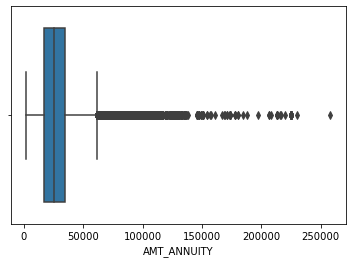

In [30]:
sns.boxplot(df1.AMT_ANNUITY)
plt.show()

* AMT_ANNUITY have outlier which is very large we can impute missing values with Median.

In [31]:
df1["AMT_ANNUITY"].fillna(df1["AMT_ANNUITY"].median,inplace=True)

In [32]:
df1["AMT_ANNUITY"].isna().sum()

0

In [33]:
#Missing values in "AMT_GOODS_PRICE" column
df1.AMT_GOODS_PRICE.isnull().sum()

278

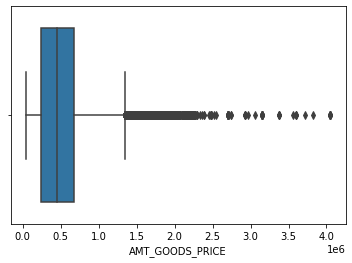

In [34]:
sns.boxplot(df1.AMT_GOODS_PRICE)
plt.show()

* AMT_GOODS_PRICE has less percentage of missing values. And also has outliers. These missing values can be imputed with median

In [35]:
df1["AMT_GOODS_PRICE"].fillna(df1["AMT_GOODS_PRICE"].median,inplace=True)

In [36]:
df1["AMT_GOODS_PRICE"].isna().sum()

0

In [37]:
df1.EXT_SOURCE_2.isnull().sum()

660

In [38]:
df1.EXT_SOURCE_2.describe()

count    3.068510e+05
mean     5.143927e-01
std      1.910602e-01
min      8.173617e-08
25%      3.924574e-01
50%      5.659614e-01
75%      6.636171e-01
max      8.549997e-01
Name: EXT_SOURCE_2, dtype: float64

In [39]:
df1["EXT_SOURCE_2"].fillna(0,inplace=True)

In [40]:
df1["EXT_SOURCE_2"].isna().sum()

0

In [41]:
#Missing values in "NAME_TYPE_SUITE" column
df1.NAME_TYPE_SUITE.isnull().sum()

1292

In [42]:
df1.NAME_TYPE_SUITE.value_counts(normalize= True)

Unaccompanied      0.811596
Family             0.131112
Spouse, partner    0.037130
Children           0.010669
Other_B            0.005780
Other_A            0.002828
Group of people    0.000885
Name: NAME_TYPE_SUITE, dtype: float64

* 'NAME_TYPE_SUITE' being a categorical variable, has about 0.42% of missing values. So here we can impute the missing values with moode

In [46]:
df1["NAME_TYPE_SUITE"].fillna(df1["NAME_TYPE_SUITE"].mode()[0],inplace=True)

In [47]:
df1["NAME_TYPE_SUITE"].mode()[0]

'Unaccompanied'

In [48]:
df1["NAME_TYPE_SUITE"].isna().sum()

0

In [49]:
df1.nunique().sort_values()

REG_CITY_NOT_LIVE_CITY             2
FLAG_EMAIL                         2
FLAG_DOCUMENT_9                    2
REG_REGION_NOT_LIVE_REGION         2
REG_REGION_NOT_WORK_REGION         2
                               ...  
AMT_ANNUITY                    13673
DAYS_REGISTRATION              15688
DAYS_BIRTH                     17460
EXT_SOURCE_2                  119832
SK_ID_CURR                    307511
Length: 73, dtype: int64

In [50]:
#changing negative ages to positive ages.
df1['DAYS_BIRTH']=abs(df1['DAYS_BIRTH'])
df1['DAYS_BIRTH'].describe()

count    307511.000000
mean      16036.995067
std        4363.988632
min        7489.000000
25%       12413.000000
50%       15750.000000
75%       19682.000000
max       25229.000000
Name: DAYS_BIRTH, dtype: float64

In [51]:
#changing negative values in days to positive days
df1['DAYS_EMPLOYED']=abs(df1['DAYS_EMPLOYED'])
df1['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      67724.742149
std      139443.751806
min           0.000000
25%         933.000000
50%        2219.000000
75%        5707.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

In [52]:
#changing negative days to positive days.
df1['DAYS_REGISTRATION']=abs(df1['DAYS_REGISTRATION'])
df1['DAYS_REGISTRATION'].describe()

count    307511.000000
mean       4986.120328
std        3522.886321
min           0.000000
25%        2010.000000
50%        4504.000000
75%        7479.500000
max       24672.000000
Name: DAYS_REGISTRATION, dtype: float64

In [53]:
#changing negative days to positive 
df1['DAYS_ID_PUBLISH']=abs(df1['DAYS_ID_PUBLISH'])
df1['DAYS_ID_PUBLISH'].describe()

count    307511.000000
mean       2994.202373
std        1509.450419
min           0.000000
25%        1720.000000
50%        3254.000000
75%        4299.000000
max        7197.000000
Name: DAYS_ID_PUBLISH, dtype: float64

In [54]:
#converting the data type of categorical column
df1['REG_REGION_NOT_LIVE_REGION'] = df1['REG_REGION_NOT_LIVE_REGION'].astype(object)
df1.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 73, dtype: object

In [55]:
#Changing region from int to object
df1['REG_REGION_NOT_WORK_REGION'] = df1['REG_REGION_NOT_WORK_REGION'].astype(object)

In [56]:
#Changing region from int to object
df1['LIVE_REGION_NOT_WORK_REGION'] = df1['LIVE_REGION_NOT_WORK_REGION'].astype(object)

In [57]:
#Changing city from int to object
df1['REG_CITY_NOT_LIVE_CITY'] = df1['REG_CITY_NOT_LIVE_CITY'].astype(object)

In [58]:
#Changing city from int to object
df1['REG_CITY_NOT_WORK_CITY'] = df1['REG_CITY_NOT_WORK_CITY'].astype(object)

In [59]:
#Changing city from int to object
df1['LIVE_CITY_NOT_WORK_CITY']=df1['LIVE_CITY_NOT_WORK_CITY'].astype(object)

# Binning 

In [60]:
#Creating bins for Credit amount

bins = [0,350000,700000,1000000000]
slots = ['Low','Medium','High']

df1['AMT_CREDIT_RANGE']=pd.cut(df1['AMT_CREDIT'],bins=bins,labels=slots)

In [61]:
# Creating bins for income amount

bins = [0,200000,400000,10000000000]
slot = ['Low','Medium','High']

df1['AMT_INCOME_RANGE']=pd.cut(df1['AMT_INCOME_TOTAL'],bins,labels=slot)

In [62]:
# Creating bins for days_birth

bins = [0,7300,10950,14600,18250,21900,25500]
slot = ['0-20','20-30','30-40','40-50','50-60','60-70']

df1['AGE_RANGE']=pd.cut(df1['DAYS_BIRTH'],bins,labels=slot)

In [63]:
df1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_CREDIT_RANGE,AMT_INCOME_RANGE,AGE_RANGE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0.0,0.0,0.0,0.0,0.0,1.0,Medium,Medium,20-30
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0.0,0.0,0.0,0.0,0.0,0.0,High,Medium,40-50
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,Low,Low,50-60
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,NaN,NaN,NaN,NaN,NaN,NaN,Low,Low,50-60
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0.0,0.0,0.0,0.0,0.0,0.0,Medium,Low,50-60


In [64]:
df1.TARGET.value_counts(normalize=True)

0    0.919271
1    0.080729
Name: TARGET, dtype: float64

In [65]:
target_0  = df1[df1["TARGET"] == 0]
target_1  = df1[df1["TARGET"] == 1]
print("No. of defaulters: ", target_0.shape[0])
print("No. of non-defaulters: ", target_1.shape[0])

No. of defaulters:  282686
No. of non-defaulters:  24825


In [66]:
# percentage of defaulters:
(24825/(24825+282686))*100

8.072881945686495

In [67]:
target_1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_CREDIT_RANGE,AMT_INCOME_RANGE,AGE_RANGE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0.0,0.0,0.0,0.0,0.0,1.0,Medium,Medium,20-30
26,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,27076.5,...,0,0.0,0.0,0.0,0.0,2.0,2.0,High,Low,50-60
40,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,...,0,0.0,0.0,0.0,2.0,0.0,4.0,High,Medium,40-50
42,100049,1,Cash loans,F,N,N,0,135000.0,288873.0,16258.5,...,0,0.0,0.0,0.0,0.0,0.0,2.0,Low,Low,30-40
81,100096,1,Cash loans,F,N,Y,0,81000.0,252000.0,14593.5,...,0,0.0,0.0,0.0,0.0,0.0,0.0,Low,Low,60-70


# Univariate Analysis for target =0 and target=1

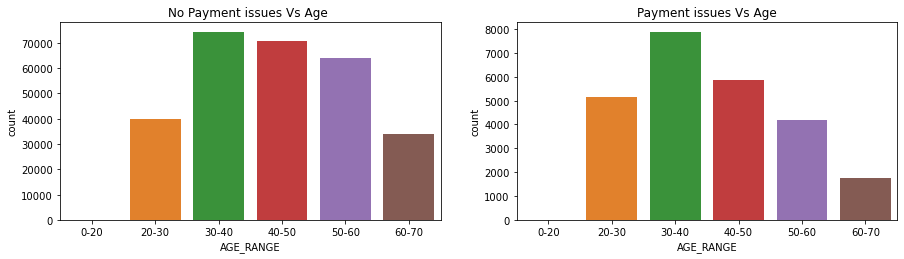

In [68]:
# subplot 1
plt.figure(figsize = (15, 8))
plt.subplot(2, 2, 1)
plt.title('No Payment issues Vs Age ')
sns.countplot(target_0['AGE_RANGE'])

# subplot 2
plt.subplot(2, 2, 2)
plt.title('Payment issues Vs Age')
sns.countplot(target_1['AGE_RANGE'])
plt.show()

* we can see that age range 30-40 and 40-50 have are able to make payment on time and can be considered while lending loan.

## Amount credit range

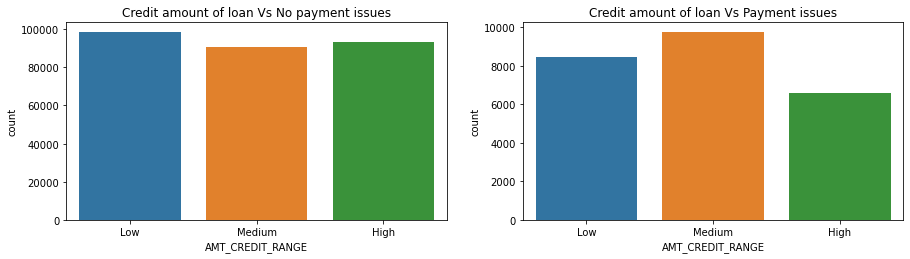

In [70]:
# subplot 1
plt.figure(figsize = (15, 8))
plt.subplot(2, 2, 1)

plt.title('Credit amount of loan Vs No payment issues')
sns.countplot(target_0['AMT_CREDIT_RANGE'])

# subplot 2
plt.subplot(2, 2, 2)
plt.title('Credit amount of loan Vs Payment issues')

sns.countplot(target_1['AMT_CREDIT_RANGE'])
plt.show()

* customers with medium credit have more payment issue. 
* customers with low credit have less payment issue. 

## Job type Vs  payment issues

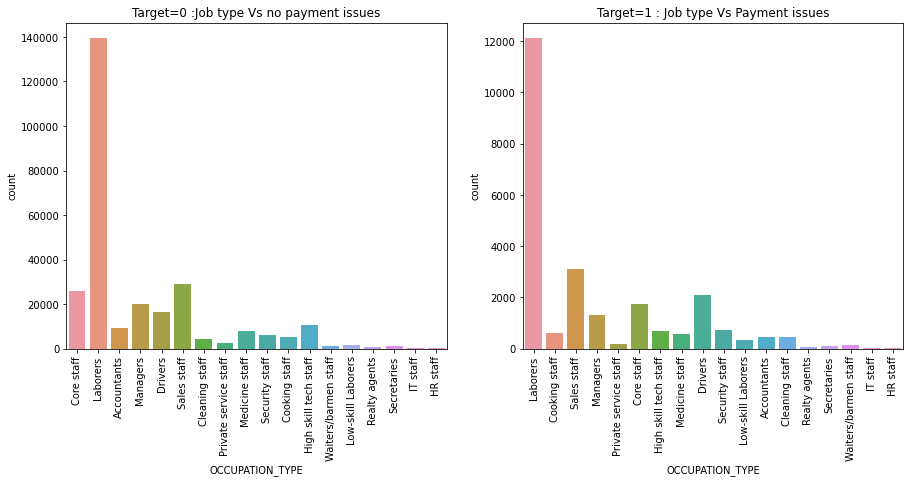

In [72]:
plt.figure(figsize = (15,6))
plt.subplot(1, 2, 1)

sns.countplot(target_0['OCCUPATION_TYPE'])
plt.title('Target=0 :Job type Vs no payment issues')

plt.xticks(rotation = 90)

# subplot 2
plt.subplot(1, 2, 2)

sns.countplot(target_1['OCCUPATION_TYPE'])
plt.title('Target=1 : Job type Vs Payment issues')

plt.xticks(rotation = 90)
plt.show()

* we can see that labores have no payment issue than other.

## Name _Income _Type

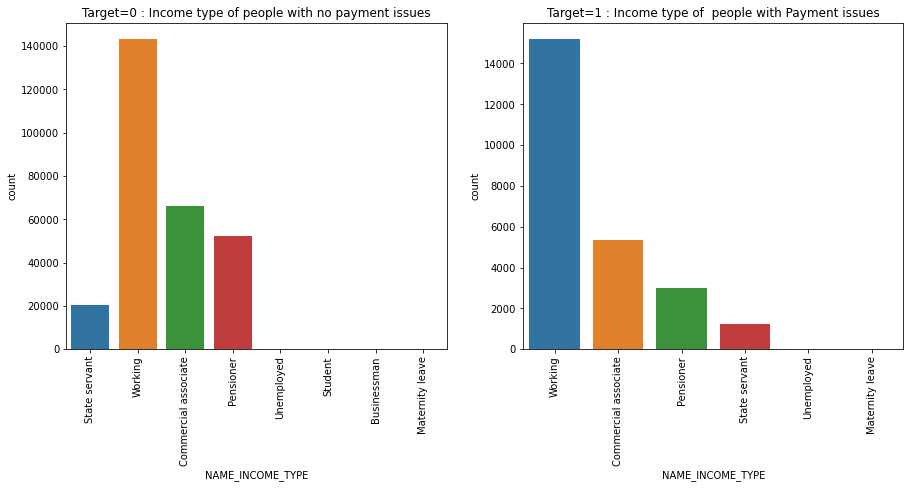

In [73]:
plt.figure(figsize = (15,6))


plt.subplot(1, 2, 1)
#plt.title()
sns.countplot(target_0['NAME_INCOME_TYPE'].dropna())
plt.title('Target=0 : Income type of people with no payment issues')
plt.xticks(rotation = 90)

# subplot 2
plt.subplot(1, 2, 2)

sns.countplot(target_1['NAME_INCOME_TYPE'].dropna())
plt.title('Target=1 : Income type of  people with Payment issues')
plt.xticks(rotation = 90)
plt.show()


* The plot clearly shows that working are most likely to make payment on time whereas unemployed  are dificulty to make payment on time

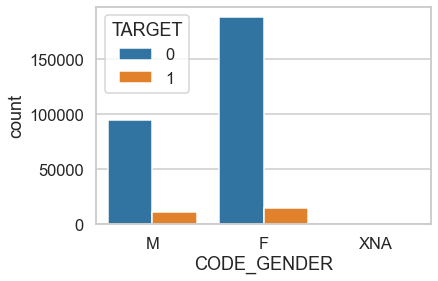

In [102]:
sns.countplot(df1['CODE_GENDER'], hue=df1["TARGET"])
plt.show()

* CODE_GENDER: Less number of males take loans but the defaulters are higher in case of males.
* Female customers pay loan amount on time and banks can target more female customers for lending loan.


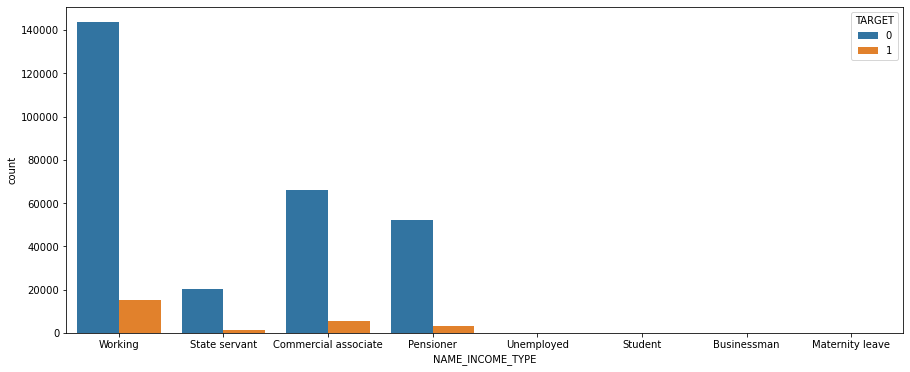

In [74]:
plt.figure(figsize = (15,6))
sns.countplot(df1['NAME_INCOME_TYPE'], hue=df1["TARGET"])
plt.show()

* NAME_INCOME_TYPE: pensioner defaulter is lower than non defaulter.
* working income types are more interested in loan.
* Working customers can be targetted to lend loans as they have higher percentage of making payments on time.
* But in working customers defaulter is higher than other we can choose different interest rate for working customers

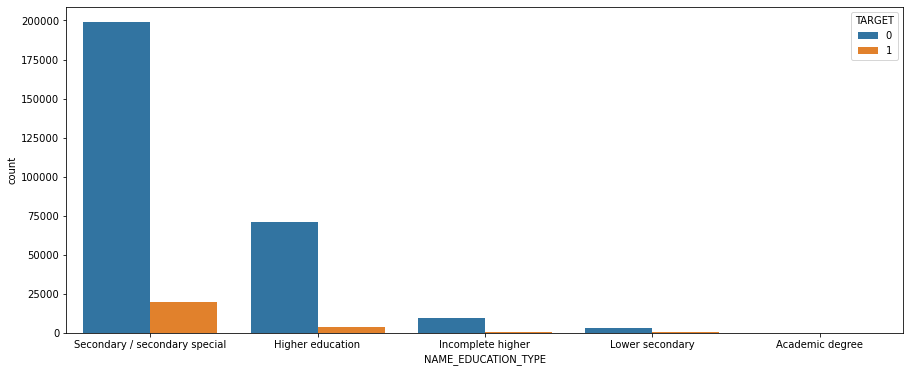

In [75]:
plt.figure(figsize = (15,6))
sns.countplot(df1['NAME_EDUCATION_TYPE'], hue=df1["TARGET"])
plt.show()

* NAME_EDUCATION_TYPE: Most customers take loan from secondary education followed by higher education. But the default rate in secondary education is much high and for higher education is much low.
* Less educated people is not interested in laon other than educated people. count of less educated people have loan is very less.
* Customers with secondary education are most likely to make payments when compared to customers with academic degree.

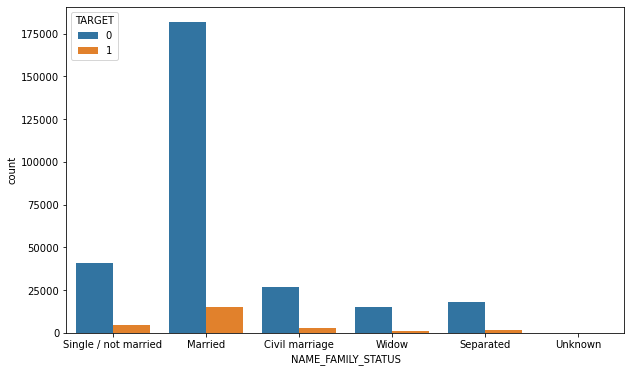

In [76]:
plt.figure(figsize = (10,6))
sns.countplot(df1['NAME_FAMILY_STATUS'], hue=df1["TARGET"])
plt.show()

* Most customers who are married take loan followed by single.
* Also in married, defaulters are high as compare to others
* Married customers have paid loan amount on time when compared to widows.

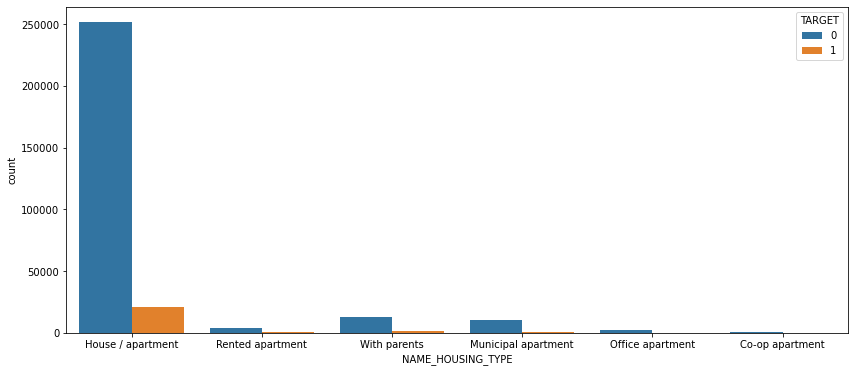

In [77]:
plt.figure(figsize = (14,6))
sns.countplot(df1['NAME_HOUSING_TYPE'], hue=df1["TARGET"])
plt.show()

* Customers owning House/apartment are most likely to make payments on time compared to those living in CO-OP apartment.

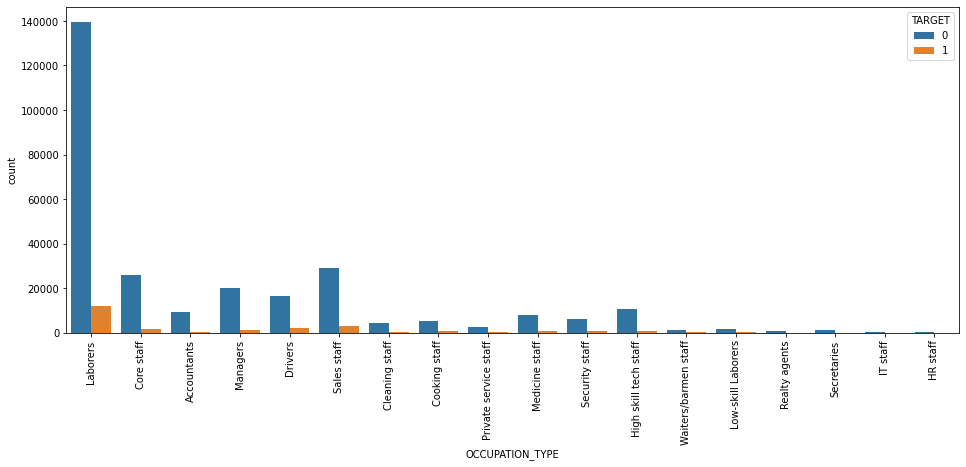

In [78]:
plt.figure(figsize = (16,6))
sns.countplot(df1['OCCUPATION_TYPE'], hue=df1["TARGET"])
plt.xticks(rotation = 90)
plt.show()

* Labourers have high repayement percentage. Hence baks can think of lending small amount loans to them.

# Bivariate Analysis for target 0 and target 1

Text(0.5, 1.0, 'AMT_INCOME_TOTAL  vs  AMT_CREDIT ')

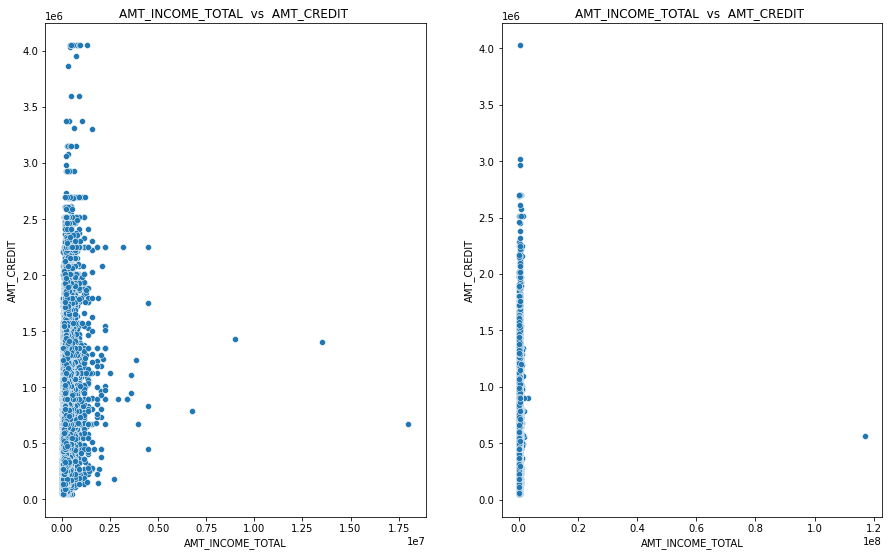

In [79]:
#Scatter plot for numeric columns

plt.figure(figsize = (15, 20))

plt.subplot(2,2,1)
sns.scatterplot(target_0.AMT_INCOME_TOTAL,target_0.AMT_CREDIT)
plt.xlabel('AMT_INCOME_TOTAL')
plt.ylabel('AMT_CREDIT')
plt.title('AMT_INCOME_TOTAL  vs  AMT_CREDIT ')

plt.subplot(2,2,2)
sns.scatterplot(target_1.AMT_INCOME_TOTAL,target_1.AMT_CREDIT)
plt.xlabel('AMT_INCOME_TOTAL')
plt.ylabel('AMT_CREDIT')
plt.title('AMT_INCOME_TOTAL  vs  AMT_CREDIT ')


* Those who have paid the loan amount on/within time are more likely to get higher credits than those who didnt pay/did late payments.

In [80]:
#correlation matrix for all numerical columns
corr=target_0.corr()
corr

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,1.000000,NaN,-0.000716,0.001739,-0.000342,0.000360,0.001346,0.001744,0.001475,0.000077,...,0.001194,0.000676,0.000832,-0.000485,-0.001879,-0.001725,0.002524,0.000054,0.001148,0.004349
TARGET,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CNT_CHILDREN,-0.000716,NaN,1.000000,0.027397,0.003081,-0.024363,-0.336966,-0.245174,-0.185792,0.028751,...,0.004181,0.001078,0.001302,-0.002983,-0.000432,0.000648,-0.001632,-0.010455,-0.007087,-0.042547
AMT_INCOME_TOTAL,0.001739,NaN,0.027397,1.000000,0.342799,0.167851,-0.062609,-0.140392,-0.064937,-0.022896,...,0.008214,0.005762,0.000840,-0.000869,0.001417,0.007862,0.006234,0.061470,0.013128,0.029536
AMT_CREDIT,-0.000342,NaN,0.003081,0.342799,1.000000,0.100604,0.047378,-0.070104,-0.013477,0.001464,...,0.035527,0.021560,0.032151,-0.015602,-0.003734,0.004409,-0.001883,0.054071,0.017767,-0.048866
REGION_POPULATION_RELATIVE,0.000360,NaN,-0.024363,0.167851,0.100604,1.000000,0.025244,-0.007198,0.052083,0.001071,...,0.013496,0.002656,-0.000112,0.003275,-0.002265,0.001969,-0.002480,0.078629,-0.001013,0.001775
DAYS_BIRTH,0.001346,NaN,-0.336966,-0.062609,0.047378,0.025244,1.000000,0.626114,0.333151,0.271314,...,-0.046491,-0.003977,-0.009797,-0.026466,-0.004461,-0.002772,0.001069,-0.002855,0.011335,0.072886
DAYS_EMPLOYED,0.001744,NaN,-0.245174,-0.140392,-0.070104,-0.007198,0.626114,1.000000,0.214511,0.276663,...,-0.041894,-0.010253,-0.010381,-0.008643,-0.004460,-0.000874,0.002223,-0.034890,0.015116,0.052169
DAYS_REGISTRATION,0.001475,NaN,-0.185792,-0.064937,-0.013477,0.052083,0.333151,0.214511,1.000000,0.100236,...,-0.018035,-0.004959,-0.007841,-0.003830,0.002730,0.000035,0.001431,0.011857,0.000527,0.026639
DAYS_ID_PUBLISH,0.000077,NaN,0.028751,-0.022896,0.001464,0.001071,0.271314,0.276663,0.100236,1.000000,...,-0.014817,-0.001691,-0.000452,-0.016622,-0.004797,0.000198,0.001655,0.008728,0.007071,0.035639


# Bivariate Analysis:
Analysing correlation for numerical columns for both Target 0 and Target1

### HEATMAP

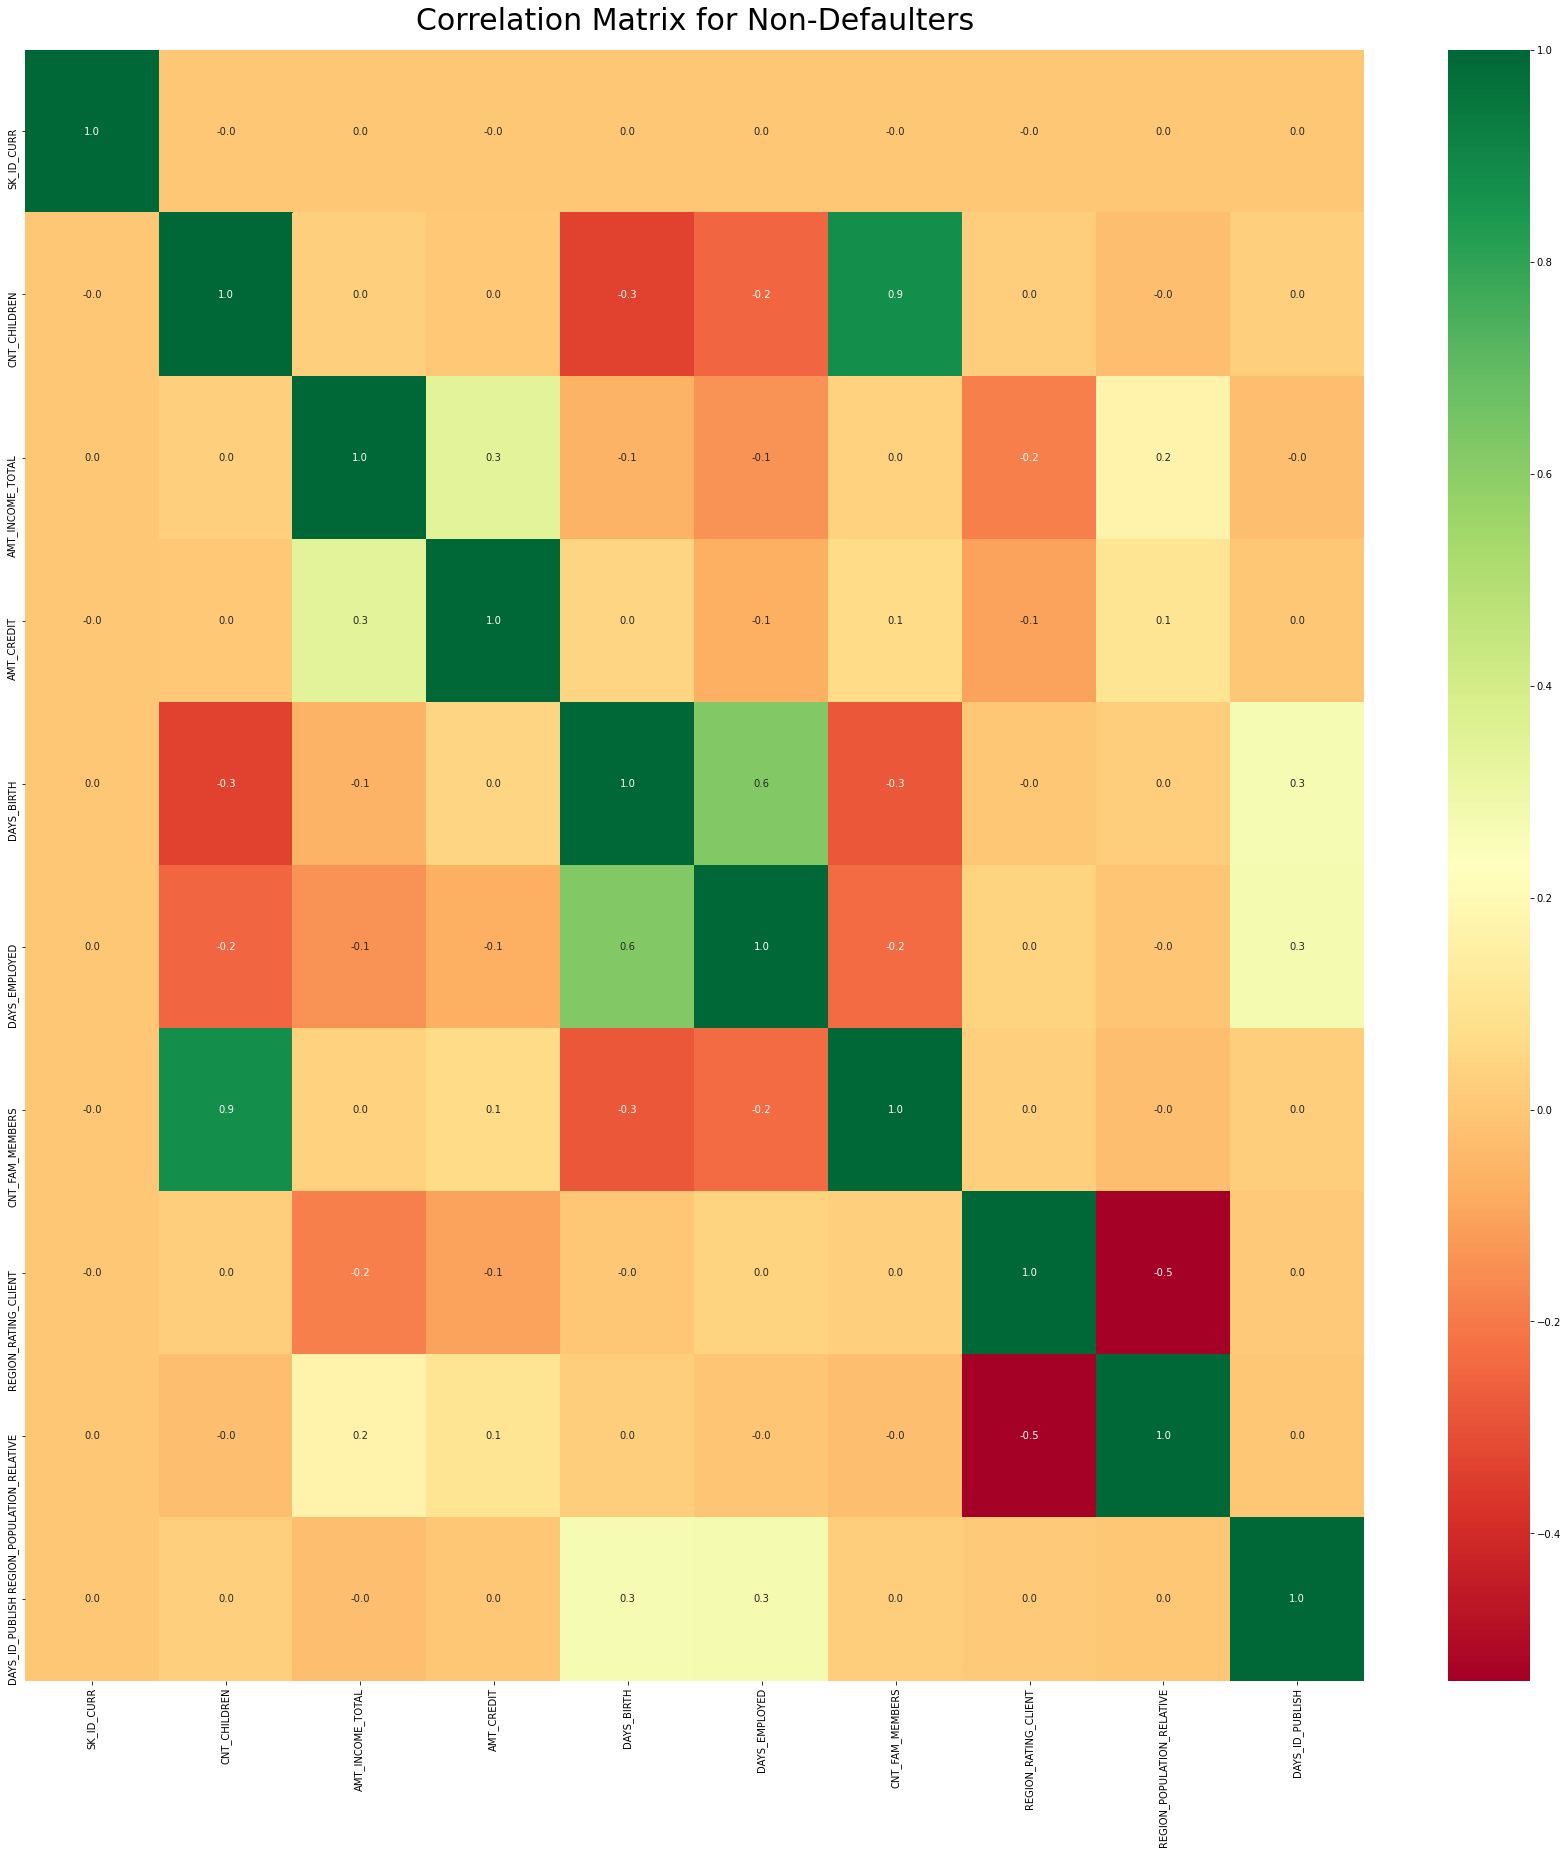

In [83]:
#Plotting Correlation matrix for Target 0 application data
d=target_0[['SK_ID_CURR','CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY',
                               'AMT_GOODS_PRICE','DAYS_BIRTH','DAYS_EMPLOYED','CNT_FAM_MEMBERS','REGION_RATING_CLIENT',
                              'REGION_POPULATION_RELATIVE','DAYS_ID_PUBLISH']]

plt.figure(figsize=(30,30))
sns.heatmap(d.corr(), fmt='.1f', cmap="RdYlGn", annot=True)
plt.title("Correlation Matrix for Non-Defaulters",fontsize=30, pad=20 )
plt.show()

** Inference:
These columns have high correlation values for Target 0.**

1. AMT_ANNUITY and AMT_CREDIT
2. AMT_GOODS_PRICE and AMT_CREDIT
3. AMT_ANNUITY and AMT_INCOME_TOTAL
4. AMT_INCOME_TOTAL and AMT_GOODS_PRICE
5. AMT_ANNUITY and AMT_GOODS_PRICE
6. CNT_FAM_MEMBERS and CNT_CHILDREN

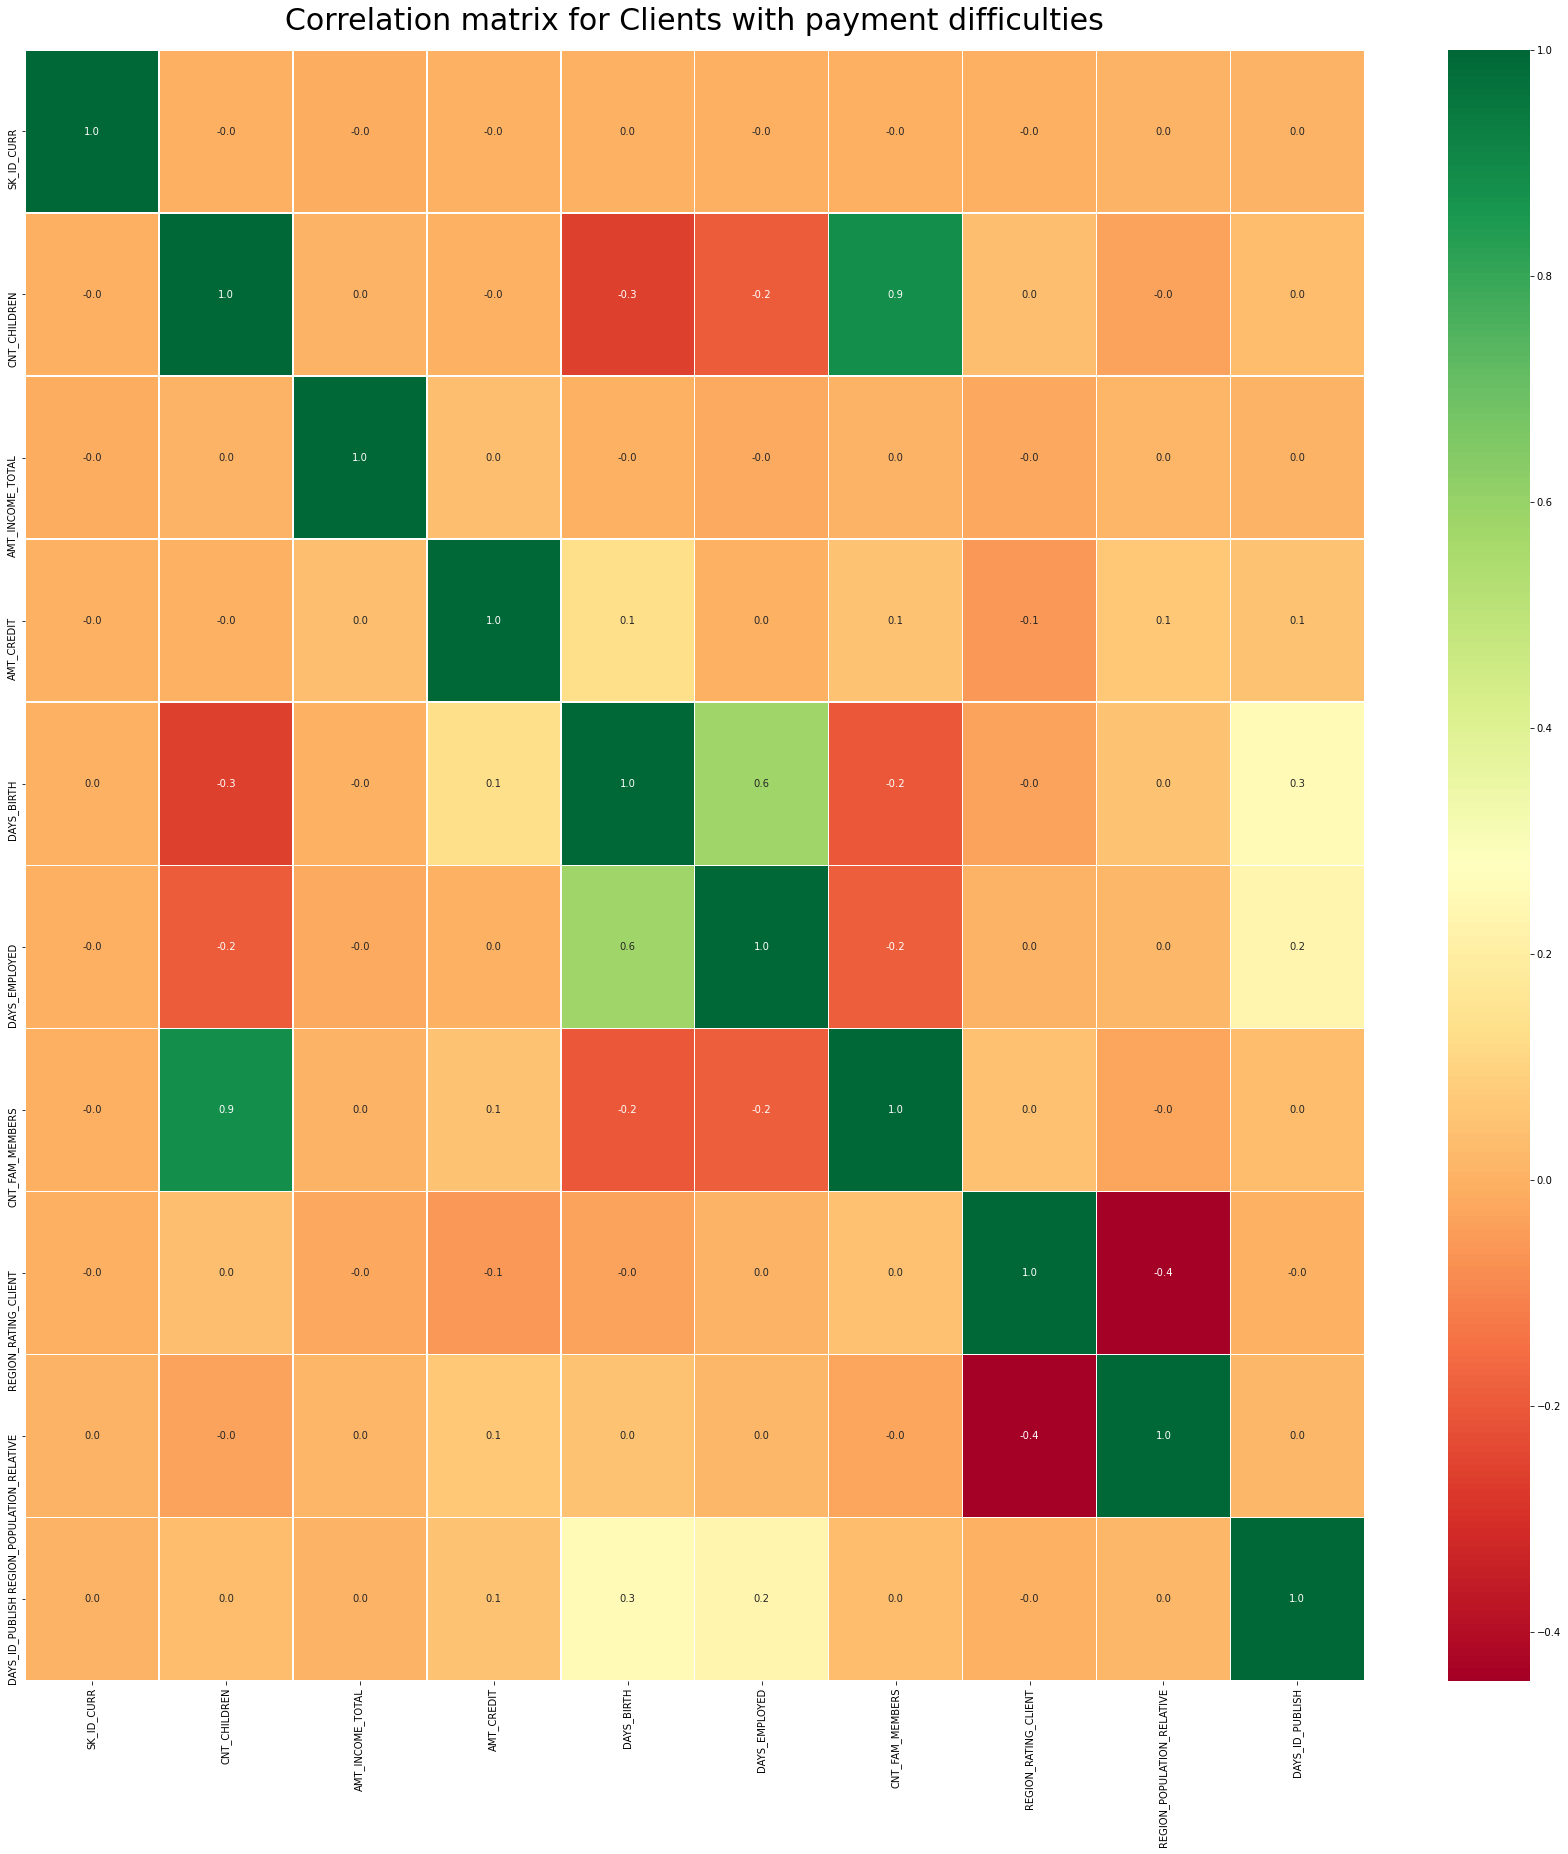

In [81]:
d=target_1[['SK_ID_CURR','CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY',
                               'AMT_GOODS_PRICE','DAYS_BIRTH','DAYS_EMPLOYED','CNT_FAM_MEMBERS','REGION_RATING_CLIENT',
                              'REGION_POPULATION_RELATIVE','DAYS_ID_PUBLISH']]
f, ax = plt.subplots(figsize=(30, 30))
sns.heatmap(d.corr(), annot=True, fmt='.1f',cmap="RdYlGn", linewidths=.5, ax=ax)
plt.title("Correlation matrix for Clients with payment difficulties",fontsize=30, pad=20 )
plt.show()

****Inference:
**Both for Target 0 and Target 1 these columns have high correlation values.

1. AMT_ANNUITY and AMT_CREDIT
2. AMT_GOODS_PRICE and AMT_CREDIT
3. AMT_ANNUITY and AMT_INCOME_TOTAL
4. CNT_FAM_MEMBER and CNT_CHILDREN
5. AMT_ANNUITY and AMT_GOODS_PRICE
6. AMT_INCOME_TOTAL and AMT_GOODS_PRICE

# Income range Vs Gender


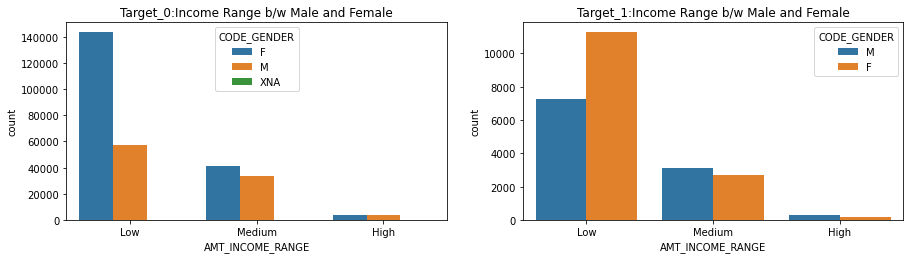

In [82]:
# Numeric variable analysis for target_0 & target_1 dataframe
plt.figure(figsize = (15, 8))
plt.subplot(2, 2, 1)
plt.title('Target_0:Income Range b/w Male and Female')

sns.countplot(x='AMT_INCOME_RANGE', hue='CODE_GENDER', data=target_0)

# subplot 2
plt.subplot(2, 2, 2)
plt.title('Target_1:Income Range b/w Male and Female')

sns.countplot(x='AMT_INCOME_RANGE', hue='CODE_GENDER', data=target_1)
plt.show()

* female which have low income are good in repay loan in time and don't have payment issues
* But it is opposite in men side, men have low  income have more payment issues

# Credit amount vs Education Status

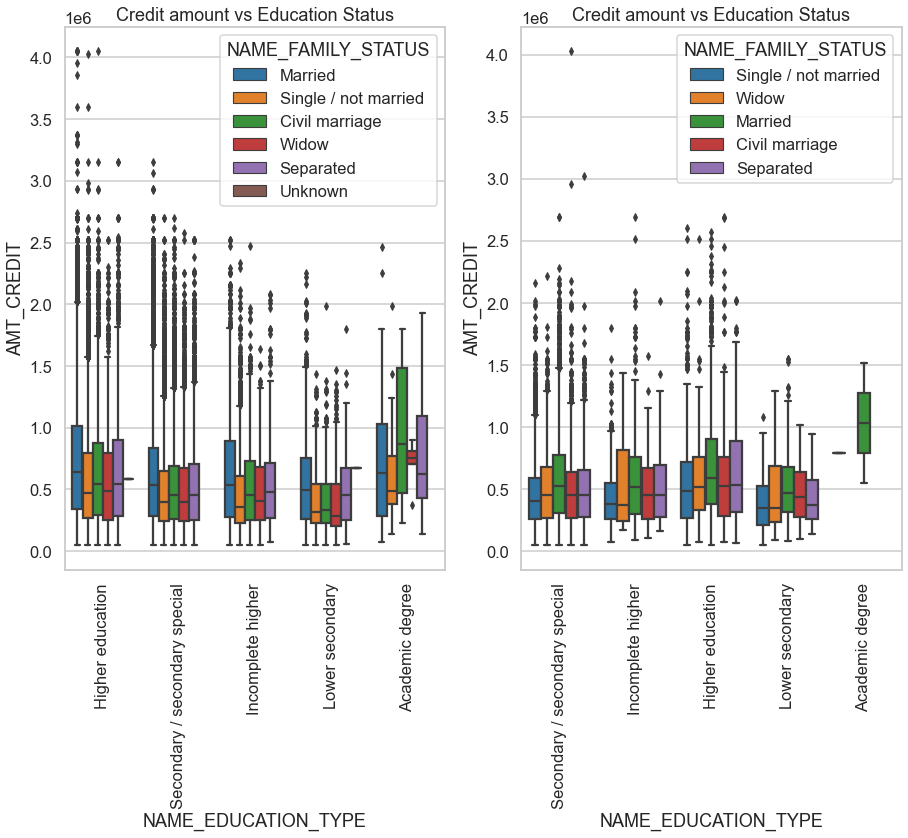

In [106]:
# Box plotting for Credit amount

plt.figure(figsize=(15,10))
plt.subplot(121)
sns.boxplot(data =target_0, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v]')
plt.title('Credit amount vs Education Status')
plt.xticks(rotation=90)

plt.subplot(122)
sns.boxplot(data =target_1, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v]')
plt.title('Credit amount vs Education Status')
plt.xticks(rotation=90)
plt.show()

From the above plot,we can see that
* Some of the highly educated, married person are having credits higher than those who have done lower secondary eduction.
* Those with higher eduction have higher credits and are more likely to make payments on time.
* More number of outliers are seen in higher education.
* The people with secondary and secndary special eduction are less likely to make payments on time.

# Income vs Education Status

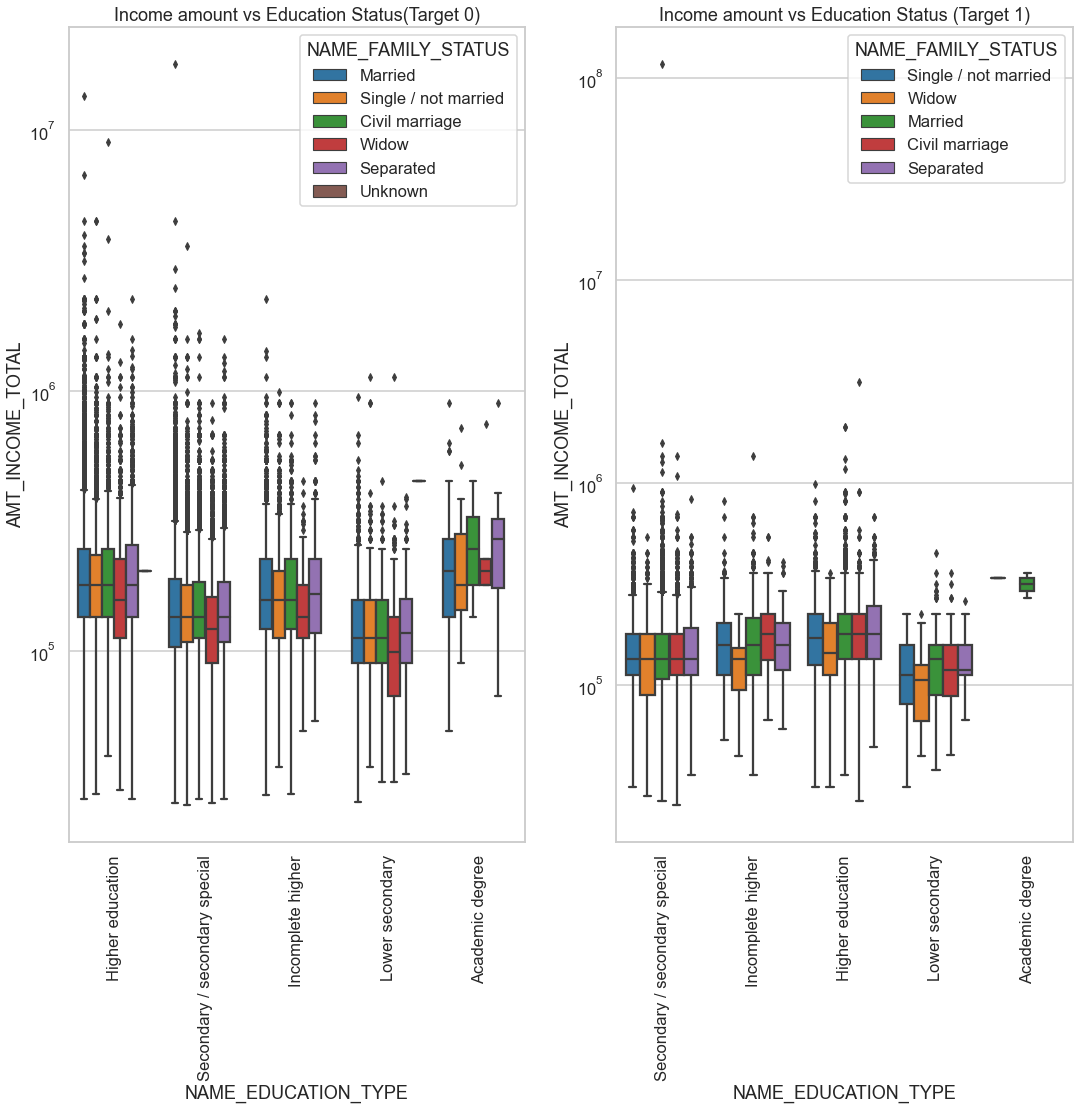

In [108]:
# Box plotting for Income amount in logarithmic scale

plt.figure(figsize=(18,15))
plt.subplot(1,2,1)
plt.yscale('log')
sns.boxplot(data =target_0, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS')
plt.title('Income amount vs Education Status(Target 0)')
plt.xticks(rotation=90)



plt.subplot(1,2,2)
plt.yscale('log')
sns.boxplot(data =target_1, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Income amount vs Education Status (Target 1)')
plt.xticks(rotation=90)
plt.show()

From the above plots,
* we can see that Higher education has many outliers.
* People with higher eductaion have higher income and dont have difficulties in making loan payment.
* People with higher education who ave lesser income are unable to pay the loan.
* Hence we can conclude that,people with Higher income are most likely to make payments.

# previous application

In [85]:
df2.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [86]:
df2.isna().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [87]:
df2.shape

(1670214, 37)

In [88]:
# Removing the column values of 'XNA' and 'XAP'

df2=df2.drop(df2[df2['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
df2=df2.drop(df2[df2['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
df2=df2.drop(df2[df2['NAME_CASH_LOAN_PURPOSE']=='XAP'].index)

In [92]:
#Merge the previous application with the current application data file
merged_df= pd.merge(df1, df2, how='inner', on='SK_ID_CURR',suffixes='_x')
merged_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_,AMT_ANNUITY_,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100034,0,Revolving loans,M,N,Y,0,90000.0,180000.0,9000.0,...,XNA,6.0,high,Cash Street: high,365243.0,-569.0,-419.0,-449.0,-443.0,1.0
1,100035,0,Cash loans,F,N,Y,0,292500.0,665892.0,24592.5,...,XNA,60.0,low_action,Cash Street: low,NaN,NaN,NaN,NaN,NaN,NaN
2,100039,0,Cash loans,M,Y,N,1,360000.0,733315.5,39069.0,...,XNA,42.0,low_normal,Cash Street: low,365243.0,-665.0,565.0,-455.0,-446.0,1.0
3,100046,0,Revolving loans,M,Y,Y,0,180000.0,540000.0,27000.0,...,XNA,18.0,low_normal,Cash Street: low,365243.0,-509.0,1.0,365243.0,365243.0,1.0
4,100046,0,Revolving loans,M,Y,Y,0,180000.0,540000.0,27000.0,...,XNA,24.0,low_normal,Cash Street: low,NaN,NaN,NaN,NaN,NaN,NaN


In [93]:
# Renaming the column names after merging

new_df = merged_df.rename({'NAME_CONTRACT_TYPE_' : 'NAME_CONTRACT_TYPE','AMT_CREDIT_':'AMT_CREDIT','AMT_ANNUITY_':'AMT_ANNUITY',
                         'WEEKDAY_APPR_PROCESS_START_' : 'WEEKDAY_APPR_PROCESS_START',
                         'HOUR_APPR_PROCESS_START_':'HOUR_APPR_PROCESS_START','NAME_CONTRACT_TYPEx':'NAME_CONTRACT_TYPE_PREV',
                         'AMT_CREDITx':'AMT_CREDIT_PREV','AMT_ANNUITYx':'AMT_ANNUITY_PREV',
                         'WEEKDAY_APPR_PROCESS_STARTx':'WEEKDAY_APPR_PROCESS_START_PREV',
                         'HOUR_APPR_PROCESS_STARTx':'HOUR_APPR_PROCESS_START_PREV'}, axis=1)
new_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100034,0,Revolving loans,M,N,Y,0,90000.0,180000.0,9000.0,...,XNA,6.0,high,Cash Street: high,365243.0,-569.0,-419.0,-449.0,-443.0,1.0
1,100035,0,Cash loans,F,N,Y,0,292500.0,665892.0,24592.5,...,XNA,60.0,low_action,Cash Street: low,NaN,NaN,NaN,NaN,NaN,NaN
2,100039,0,Cash loans,M,Y,N,1,360000.0,733315.5,39069.0,...,XNA,42.0,low_normal,Cash Street: low,365243.0,-665.0,565.0,-455.0,-446.0,1.0
3,100046,0,Revolving loans,M,Y,Y,0,180000.0,540000.0,27000.0,...,XNA,18.0,low_normal,Cash Street: low,365243.0,-509.0,1.0,365243.0,365243.0,1.0
4,100046,0,Revolving loans,M,Y,Y,0,180000.0,540000.0,27000.0,...,XNA,24.0,low_normal,Cash Street: low,NaN,NaN,NaN,NaN,NaN,NaN


In [94]:
# Removing unwanted columns for analysis

new_df.drop(['SK_ID_CURR','WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START','REG_REGION_NOT_LIVE_REGION', 
              'REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
              'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY','WEEKDAY_APPR_PROCESS_START_PREV',
              'HOUR_APPR_PROCESS_START_PREV', 'FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY'],axis=1,inplace=True)

new_df.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE_,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,0,Revolving loans,M,N,Y,0,90000.0,180000.0,9000.0,180000.0,...,XNA,6.0,high,Cash Street: high,365243.0,-569.0,-419.0,-449.0,-443.0,1.0
1,0,Cash loans,F,N,Y,0,292500.0,665892.0,24592.5,477000.0,...,XNA,60.0,low_action,Cash Street: low,NaN,NaN,NaN,NaN,NaN,NaN
2,0,Cash loans,M,Y,N,1,360000.0,733315.5,39069.0,679500.0,...,XNA,42.0,low_normal,Cash Street: low,365243.0,-665.0,565.0,-455.0,-446.0,1.0
3,0,Revolving loans,M,Y,Y,0,180000.0,540000.0,27000.0,540000.0,...,XNA,18.0,low_normal,Cash Street: low,365243.0,-509.0,1.0,365243.0,365243.0,1.0
4,0,Revolving loans,M,Y,Y,0,180000.0,540000.0,27000.0,540000.0,...,XNA,24.0,low_normal,Cash Street: low,NaN,NaN,NaN,NaN,NaN,NaN


In [95]:
new_df.head()


,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE_,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,0,Revolving loans,M,N,Y,0,90000.0,180000.0,9000.0,180000.0,...,XNA,6.0,high,Cash Street: high,365243.0,-569.0,-419.0,-449.0,-443.0,1.0
1,0,Cash loans,F,N,Y,0,292500.0,665892.0,24592.5,477000.0,...,XNA,60.0,low_action,Cash Street: low,NaN,NaN,NaN,NaN,NaN,NaN
2,0,Cash loans,M,Y,N,1,360000.0,733315.5,39069.0,679500.0,...,XNA,42.0,low_normal,Cash Street: low,365243.0,-665.0,565.0,-455.0,-446.0,1.0
3,0,Revolving loans,M,Y,Y,0,180000.0,540000.0,27000.0,540000.0,...,XNA,18.0,low_normal,Cash Street: low,365243.0,-509.0,1.0,365243.0,365243.0,1.0
4,0,Revolving loans,M,Y,Y,0,180000.0,540000.0,27000.0,540000.0,...,XNA,24.0,low_normal,Cash Street: low,NaN,NaN,NaN,NaN,NaN,NaN


# Univariate Analysis



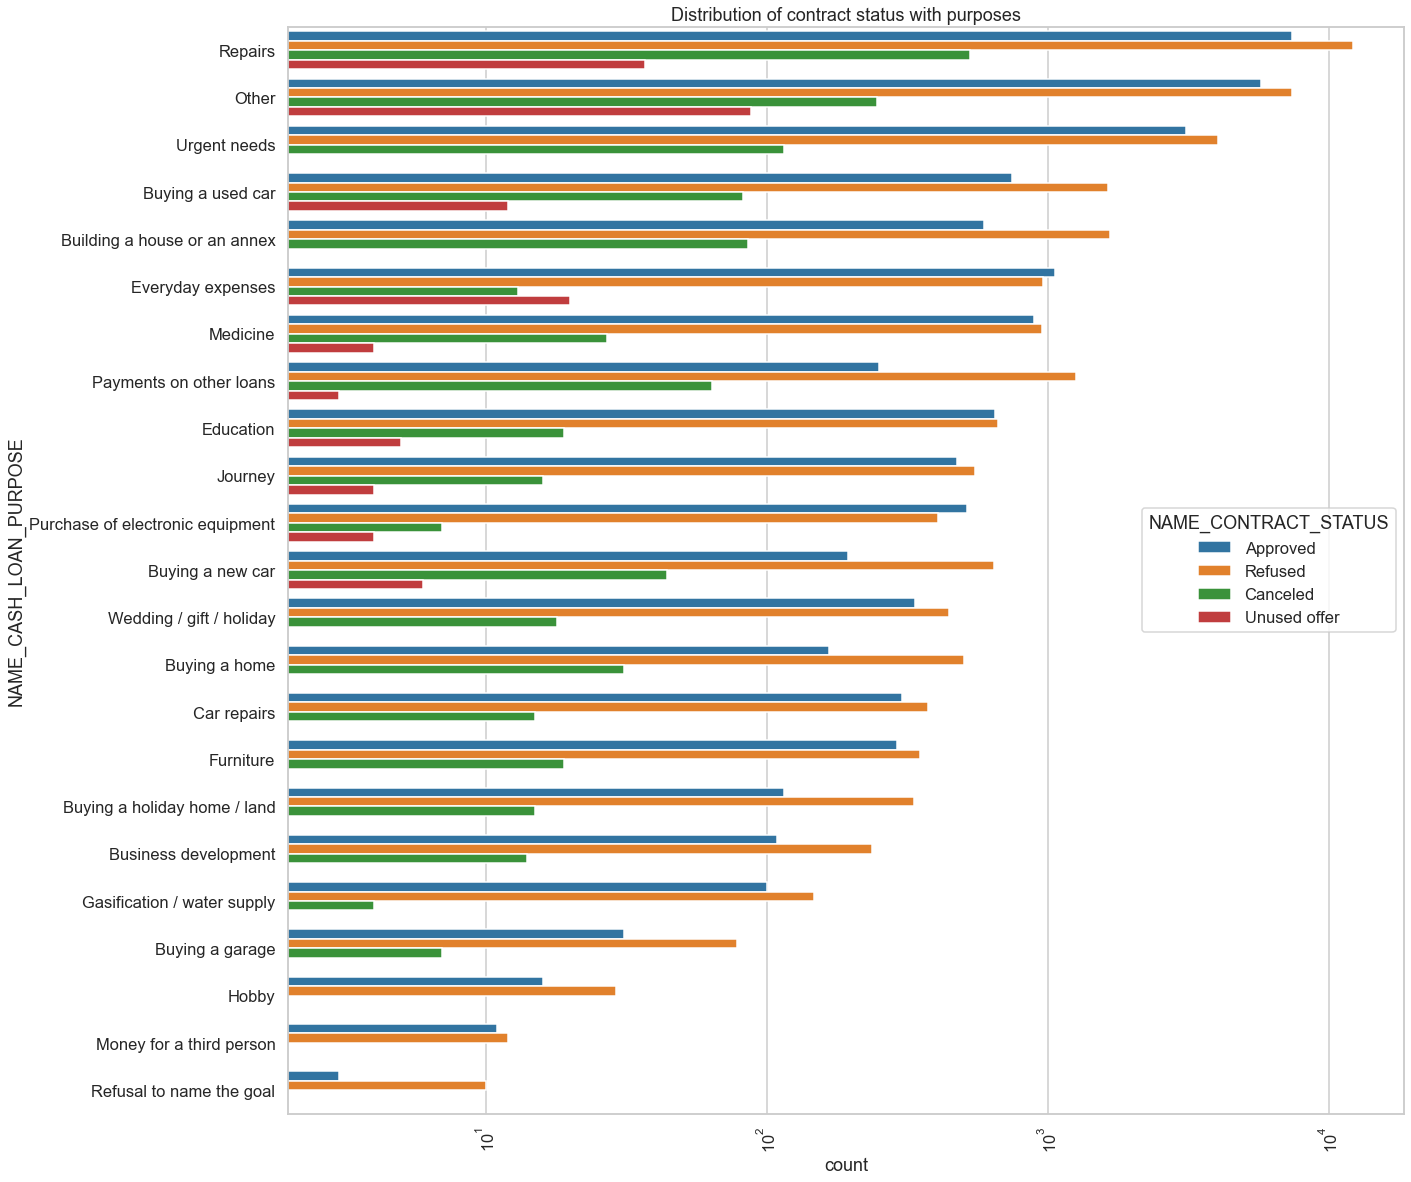

In [97]:
# Distribution of contract status in logarithmic scale
sns.set_style('whitegrid')
sns.set_context('talk')

plt.figure(figsize=(20,20))

plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distribution of contract status with purposes')
ax=sns.countplot(data = new_df, y='NAME_CASH_LOAN_PURPOSE', order=merged_df['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'NAME_CONTRACT_STATUS')

* Most rejection of loans came from purpose 'Repairs'. 
* For education purposes we have equal number of approves and rejection Paying other loans 
* buying a new car is having significant higher rejection than approves.

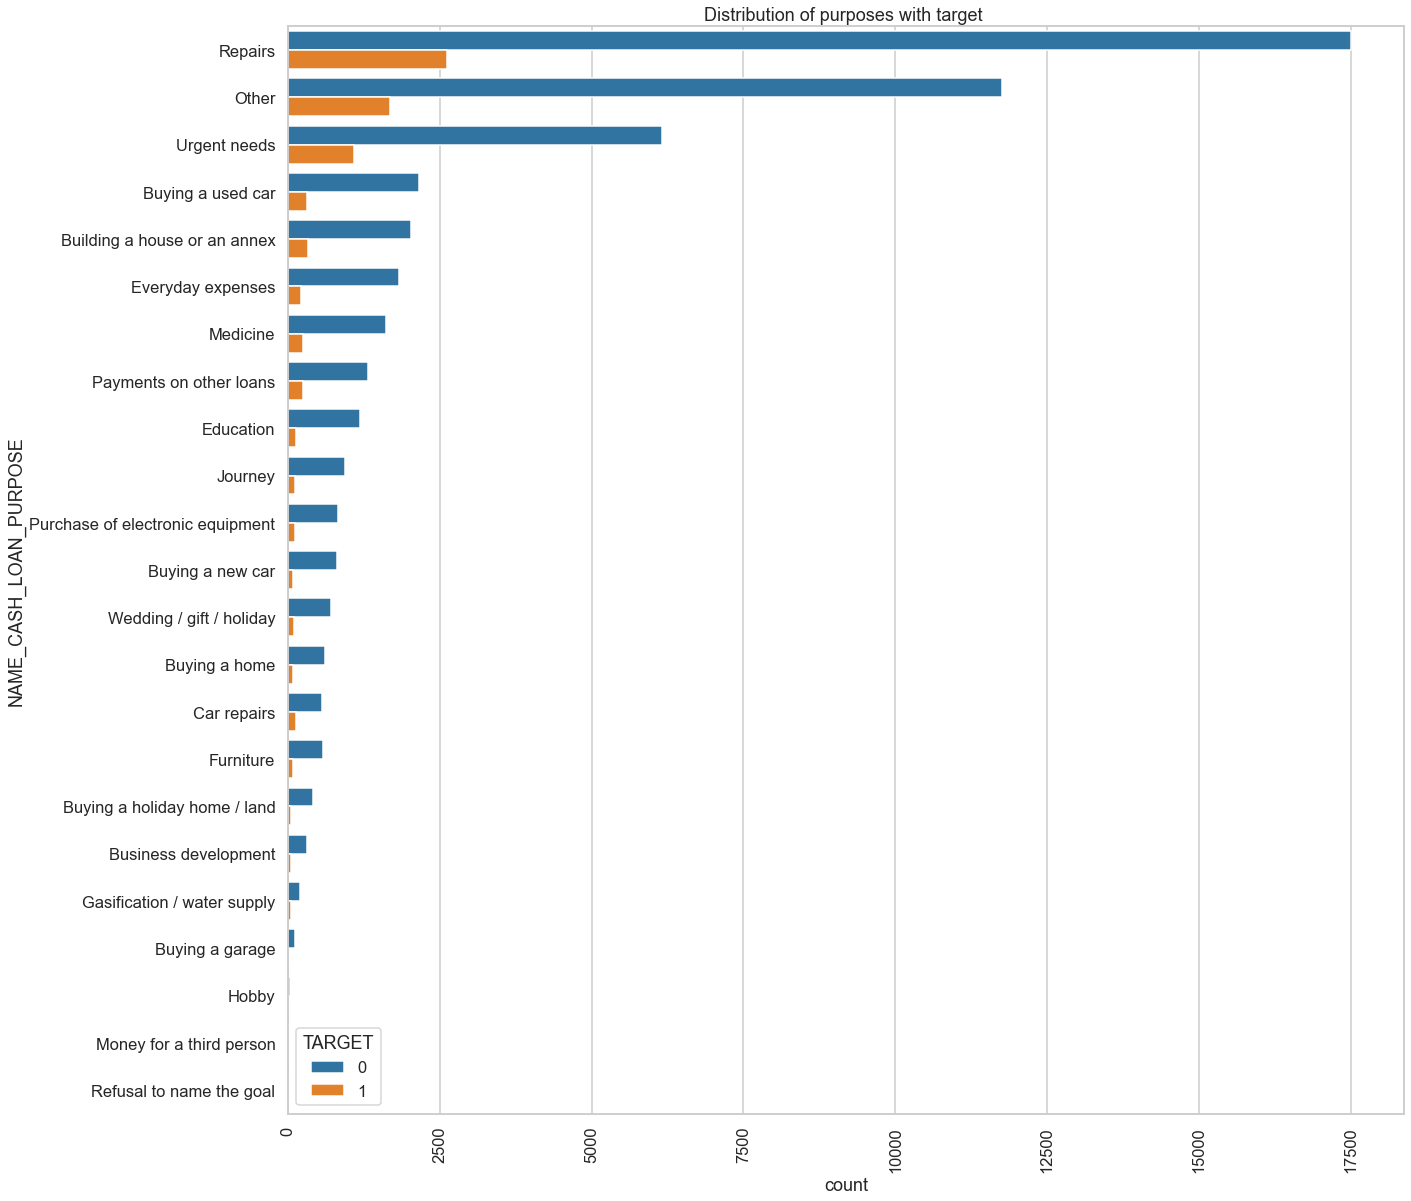

In [99]:
# Distribution of contract status

plt.figure(figsize=(20,20))

plt.xticks(rotation=90)

plt.title('Distribution of purposes with target ')
ax = sns.countplot(data = new_df, y= 'NAME_CASH_LOAN_PURPOSE', order=merged_df['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'TARGET')

* Loan purposes with 'Repairs' are facing more difficulites in payment on time.
* There are few places where loan payment is significant higher than facing difficulties. 
* They are 'Buying a garage', 'Business developemt', 'Buying land','Buying a new car' and 'Education' 
* Hence we can focus on these purposes for which the client is having for minimal payment difficulties

# Bivariate Analysis

* Prev Credit amount vs Loan Purpose

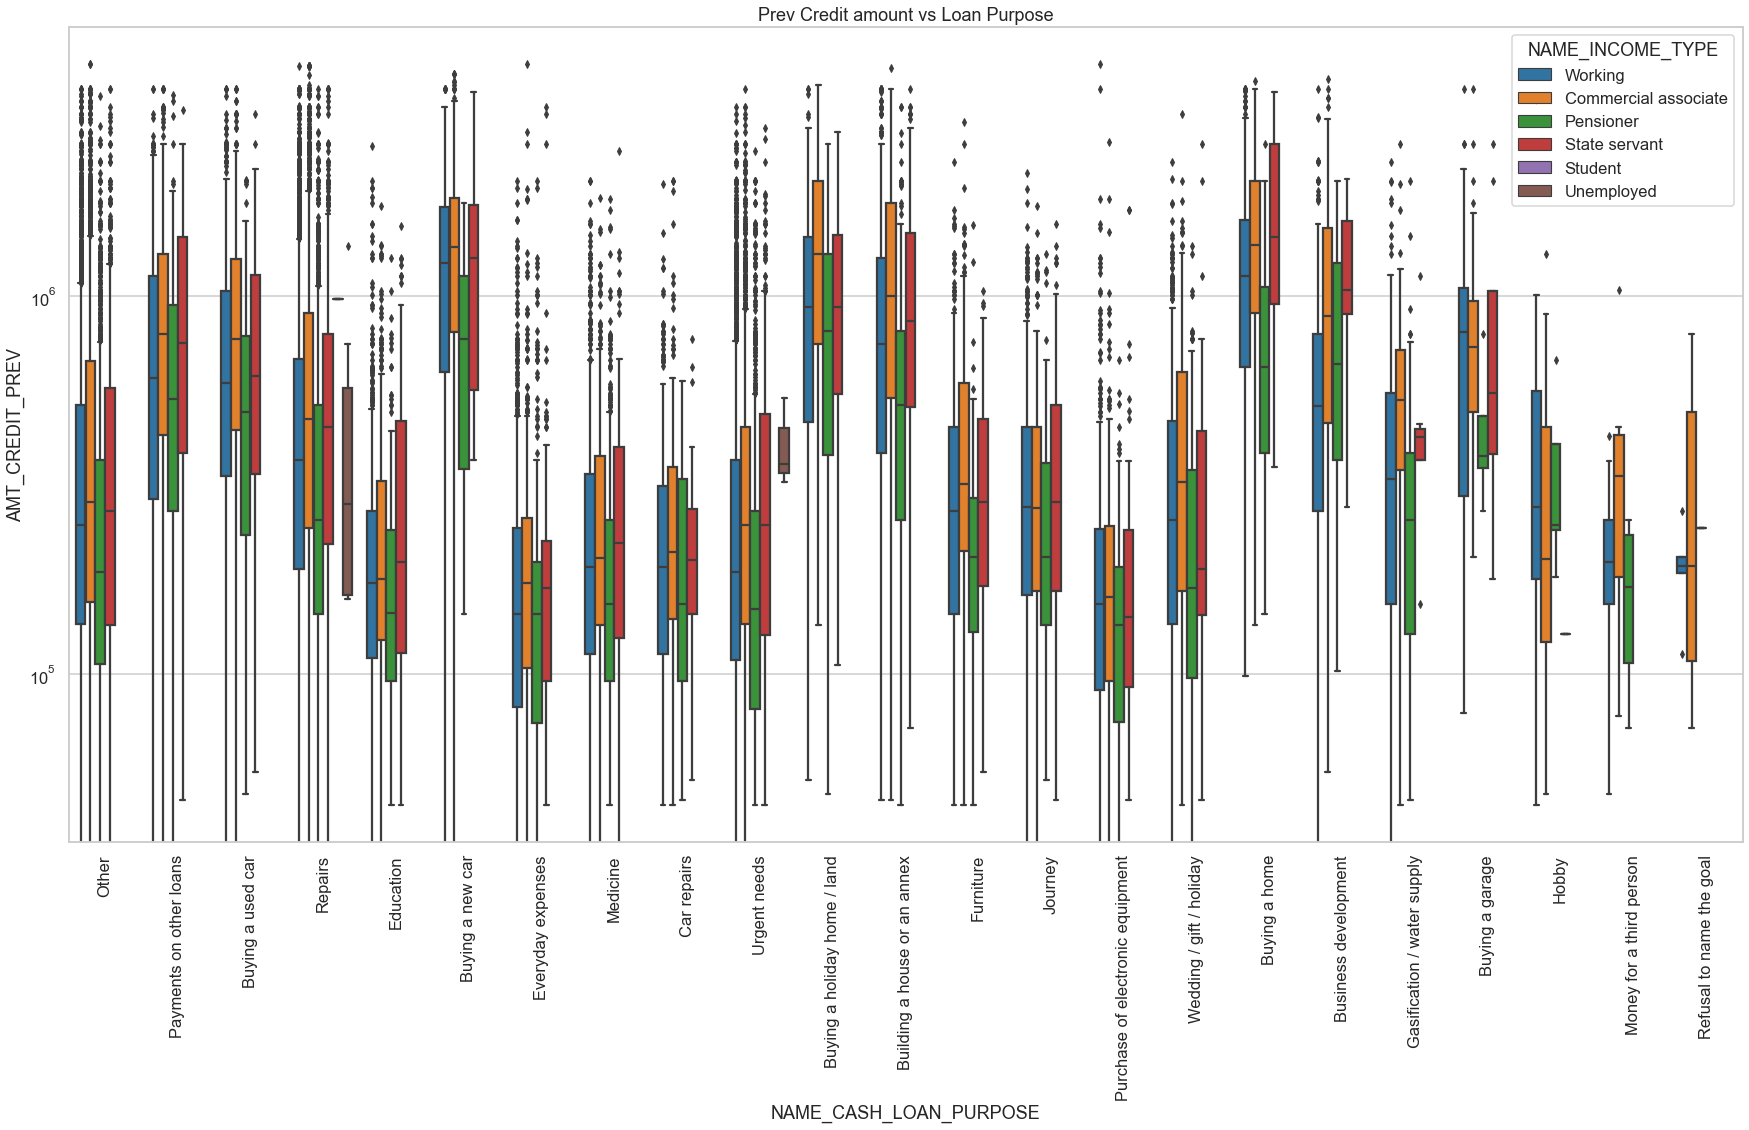

In [100]:
# Box plotting for Credit amount in logarithmic scale

plt.figure(figsize=(30,15))
plt.xticks(rotation=90)
plt.yscale('log')

sns.boxplot(data =new_df, x='NAME_CASH_LOAN_PURPOSE',hue='NAME_INCOME_TYPE',y='AMT_CREDIT_PREV',orient='v')
plt.title('Prev Credit amount vs Loan Purpose')
plt.show()

* from the above we can conclude some points- The credit amount of Loan purposes like 'Buying a home','Buying a land','Buying a new car' and'Building a house' is higher. Income type of state servants have a significant amount of credit applied Money for third person or a Hobby is having less credits applied for.

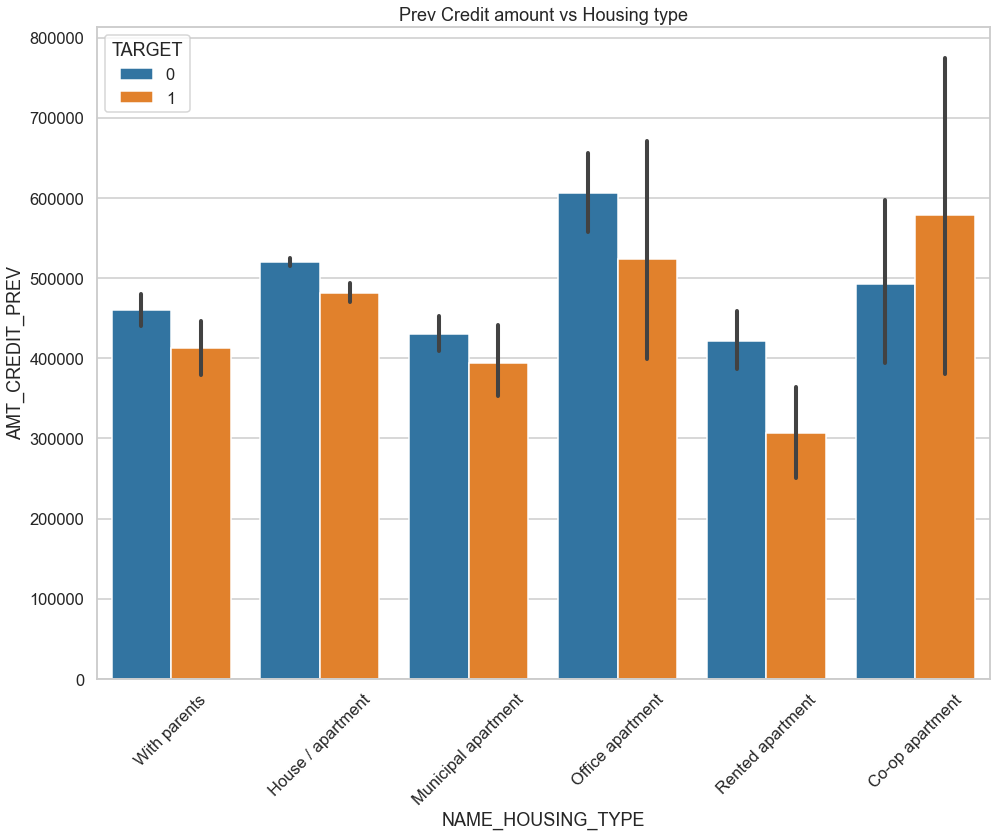

In [109]:
# Box plotting for Credit amount prev vs Housing type in logarithmic scale

plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
sns.barplot(data =new_df, y='AMT_CREDIT_PREV',hue='TARGET',x='NAME_HOUSING_TYPE',)
plt.title('Prev Credit amount vs Housing type')
plt.show()

* Here for Housing type, office appartment is having higher credit of target 0 and co-op apartment is having higher credit of target 1. So, we can conclude that bank should avoid giving loans to the housing type of co-op apartment as they are having difficulties in payment. Bank can focus mostly on housing type with parents or House\appartment or miuncipal appartment for successful payments.


* CONCLUSION
1. Banks should focus more on contract type ‘Student’ ,’pensioner’ and ‘Businessman’ with housing ‘type other than ‘Co-op apartment’ for successful payments.
2. Banks should focus less on income type ‘Working’ as they are having most number of unsuccessful payments.
3. Also with loan purpose ‘Repair’ is having higher number of unsuccessful payments on time.
4. Get as much as clients from housing type ‘With parents’ as they are having least number of unsuccessful payments.